In [2]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [3]:
df = pd.read_csv("../../data files/avocado.csv")

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df = df.loc[(df.type == 'conventional') & (df.region == "TotalUS")]
df["Date"]= pd.to_datetime(df["Date"])
data = df[['Date','AveragePrice']].reset_index(drop=True)
data = data.rename(columns = {'Date':'ds','AveragePrice':'y'})
data.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


<AxesSubplot:xlabel='ds'>

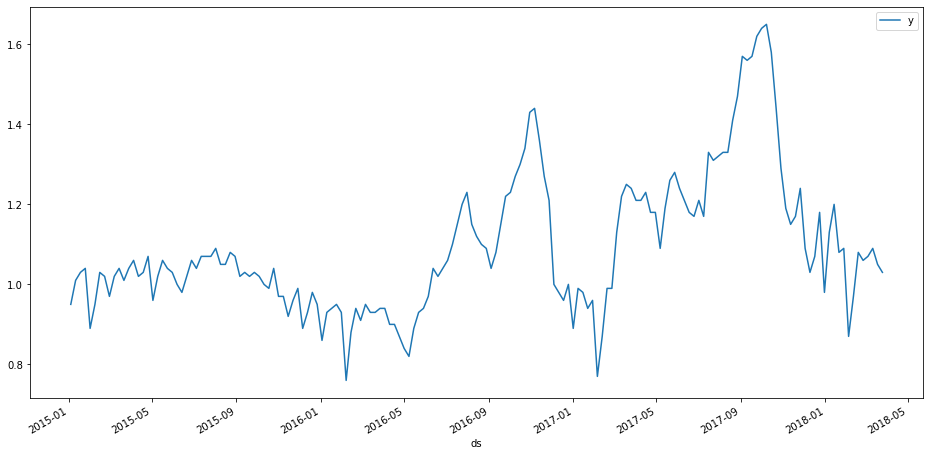

In [8]:
data.plot(x='ds',y='y',figsize = (16,8))

In [10]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.171972,0.984644,1.254947,1.107934,1.235947,-0.059338,-0.059338,-0.059338,-0.059338,-0.059338,-0.059338,0.0,0.0,0.0,1.112634
530,2019-03-22,1.171861,0.998244,1.250255,1.107547,1.236265,-0.057928,-0.057928,-0.057928,-0.057928,-0.057928,-0.057928,0.0,0.0,0.0,1.113933
531,2019-03-23,1.171750,0.982285,1.249383,1.106864,1.236562,-0.056045,-0.056045,-0.056045,-0.056045,-0.056045,-0.056045,0.0,0.0,0.0,1.115706
532,2019-03-24,1.171640,0.996199,1.239347,1.106182,1.236827,-0.053704,-0.053704,-0.053704,-0.053704,-0.053704,-0.053704,0.0,0.0,0.0,1.117936
533,2019-03-25,1.171529,0.990148,1.248840,1.105568,1.236888,-0.050936,-0.050936,-0.050936,-0.050936,-0.050936,-0.050936,0.0,0.0,0.0,1.120593


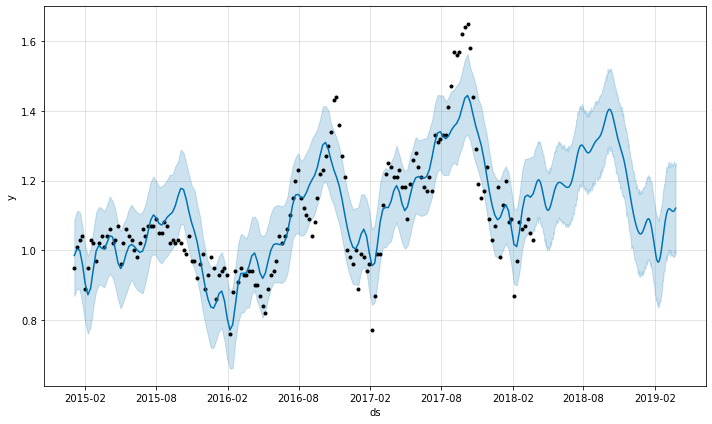

In [11]:
fig1 = model.plot(forecast)

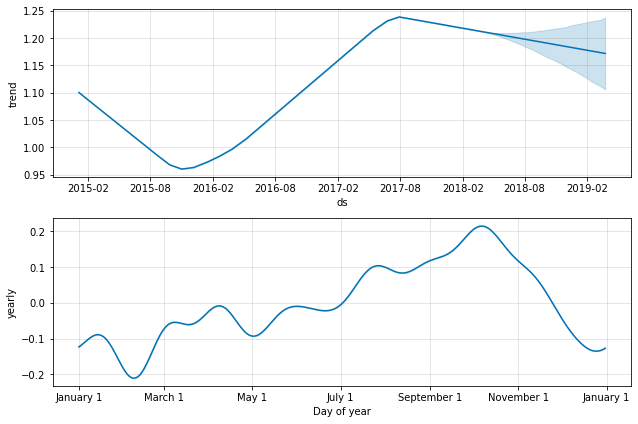

In [12]:
fig2 = model.plot_components(forecast)